In [8]:
import os
import random
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import cv2
from tensorflow import keras
import tensorflow as tf
import keras.backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation, SimpleRNN
from tensorflow.keras.layers import BatchNormalization, Reshape, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from PIL import Image
from PIL import UnidentifiedImageError

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import itertools
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [9]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [10]:
#upright = os.listdir(r'/content/drive/MyDrive/posture/Upright Sitting')
#Crossed_legs = os.listdir(r'/content/drive/MyDrive/posture/Crossing legs')
#slant_bending = os.listdir(r'/content/drive/MyDrive/posture/Slant Bending')
#Lordosis = os.listdir(r'/content/drive/MyDrive/posture/Lordosis')
#slouching = os.listdir(r'/content/drive/MyDrive/posture/Slouching')

MPII = os.listdir('C:/Users/Dell/data/MPII')
bicycling = os.listdir('C:/Users/Dell/data/MPII_DA/bicycling')
#conditioning_exercise = os.listdir('C:/Users/Dell/data/MPII/conditioning_exercise')
dancing = os.listdir('C:/Users/Dell/data/MPII_DA/dancing')
#fishing_and_hunting = os.listdir('C:/Users/Dell/data/MPII/fishing_and_hunting')
#home_repair = os.listdir('C:/Users/Dell/data/MPII/home_repair')
#home_activities = os.listdir('C:/Users/Dell/data/MPII/home_activities')
#inactivity = os.listdir('C:/Users/Dell/data/MPII/inactivity')
#lawn_and_garden = os.listdir('C:/Users/Dell/data/MPII/lawn_and_garden')
#miscellaneous = os.listdir('C:/Users/Dell/data/MPII/miscellaneous')
#music_playing = os.listdir('C:/Users/Dell/data/MPII/music_playing')
#occupation = os.listdir('C:/Users/Dell/data/MPII/occupation')
#religious_activities = os.listdir('C:/Users/Dell/data/MPII/religious_activities')
running = os.listdir('C:/Users/Dell/data/MPII_DA/running')
#self_care = os.listdir('C:/Users/Dell/data/MPII/self_care')
#sports = os.listdir('C:/Users/Dell/data/MPII/sports')
#transportation = os.listdir('C:/Users/Dell/data/MPII/transportation')
#volunteer_activities = os.listdir('C:/Users/Dell/data/MPII/volunteer_activities')
walking = os.listdir('C:/Users/Dell/data/MPII_DA/walking')
#water_activities = os.listdir('C:/Users/Dell/data/MPII/water_activities')
#winter_activities = os.listdir('C:/Users/Dell/data/MPII/winter_activities')

In [11]:
img_w, img_h = 224, 224 #setting the image width and height for easy processing
X = []
y = []

for i in bicycling:
    try:
        img = Image.open("C:/Users/Dell/data/MPII_DA/bicycling/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(0)
    except UnidentifiedImageError: # it passes an image that wasn't correctly identified
        pass
    
    
for i in dancing:
    try:
        img = Image.open("C:/Users/Dell/data/MPII_DA/dancing/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(1)
    except UnidentifiedImageError:
        pass
    

for i in running:
    try:
        img = Image.open("C:/Users/Dell/data/MPII_DA/running/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(2)
    except UnidentifiedImageError:
        pass


for i in walking:
    try:
        img = Image.open("C:/Users/Dell/data/MPII_DA/walking/" + i).convert('RGB')
        img = img.resize((img_w,img_h))
        X.append(np.asarray(img))
        y.append(3)
    except UnidentifiedImageError:
        pass
    

X = np.asarray(X)
y = np.asarray(y)
print(X.shape, y.shape)

# I resized each image to our manually defined width and height(img_w, img_h)
# I also changed the images to an array



(2787, 224, 224, 3) (2787,)


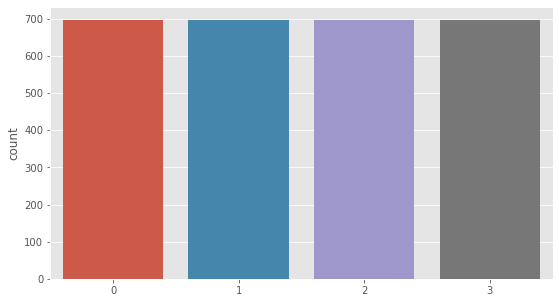

In [5]:
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(9,5))
sns.countplot(y)
plt.show()

In [12]:
x = X.astype('float32')
x /= 255

#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)

num_classes = 4

labels = keras.utils.to_categorical(y, num_classes)
print(labels[0])

[1. 0. 0. 0.]


In [13]:
# splitting our dataset into train and test
x_train1, x_test, y_train1, y_test = train_test_split(x, labels, test_size = 0.10, random_state=5)
x_train,x_val,y_train,y_val=train_test_split(x_train1,y_train1,test_size=0.10,random_state=5)


print('Number of train: {}'.format(len(x_train)))
print('Number of validation: {}'.format(len(x_val)))
print('Number of test: {}'.format(len(x_test)))

Number of train: 2257
Number of validation: 251
Number of test: 279


In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# create a Sequential model
model = Sequential()

# add convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation function
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))

# add max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# add convolutional layer with 64 filters, a 3x3 kernel, and ReLU activation function
model.add(Conv2D(64, (3, 3), activation='relu'))

# add max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# add convolutional layer with 128 filters, a 3x3 kernel, and ReLU activation function
model.add(Conv2D(128, (3, 3), activation='relu'))

# add max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# add flatten layer
model.add(Flatten())

# add fully connected layer with 512 units and ReLU activation function
model.add(Dense(512, activation='relu'))

# add dropout layer with 0.5 dropout rate
model.add(Dropout(0.5))

# add output layer with softmax activation function
model.add(Dense(4, activation='softmax'))

# compile the model with categorical crossentropy loss, adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 128)     

In [32]:
# train the model with 10 epochs and 32 batch size
#history = model.fit(x_train,y_train,validation_data=(x_val,y_val), epochs=10, batch_size=32)


In [14]:
# evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

9/9 [==============================] - 6s 595ms/step - loss: 1.2543 - accuracy: 0.7348
Test accuracy: 0.7347670197486877


In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# Implement a learning rate schedule
def lr_schedule(epoch):
    if epoch < 5:
        return 0.001
    elif epoch < 10:
        return 0.0005
    else:
        return 0.0001

lr_scheduler = LearningRateScheduler(lr_schedule)

# Implement early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=20)


In [18]:
history= model.fit(x_train,y_train,validation_data=(x_val,y_val), epochs=50, callbacks=[lr_scheduler, early_stop])

# Save the weights of the pre-trained model
model.save_weights('optinetv2_weights.h5')

Epoch 1/50
71/71 [==============================] - 360s 5s/step - loss: 1.7461 - accuracy: 0.3460 - val_loss: 1.2605 - val_accuracy: 0.4542 - lr: 0.0010
Epoch 2/50
71/71 [==============================] - 308s 4s/step - loss: 1.1795 - accuracy: 0.4772 - val_loss: 1.1517 - val_accuracy: 0.4343 - lr: 0.0010
Epoch 3/50
71/71 [==============================] - 288s 4s/step - loss: 0.9865 - accuracy: 0.5884 - val_loss: 0.9003 - val_accuracy: 0.6574 - lr: 0.0010
Epoch 4/50
71/71 [==============================] - 269s 4s/step - loss: 0.7325 - accuracy: 0.7080 - val_loss: 0.9356 - val_accuracy: 0.6295 - lr: 0.0010
Epoch 5/50
71/71 [==============================] - 231s 3s/step - loss: 0.5272 - accuracy: 0.8073 - val_loss: 0.8316 - val_accuracy: 0.7171 - lr: 0.0010
Epoch 6/50
71/71 [==============================] - 211s 3s/step - loss: 0.3315 - accuracy: 0.8808 - val_loss: 0.8723 - val_accuracy: 0.7291 - lr: 5.0000e-04
Epoch 7/50
71/71 [==============================] - 221s 3s/step - loss:

In [19]:
Test_data = model.evaluate(x_test, y_test)

9/9 [==============================] - 10s 1s/step - loss: 1.5364 - accuracy: 0.7348


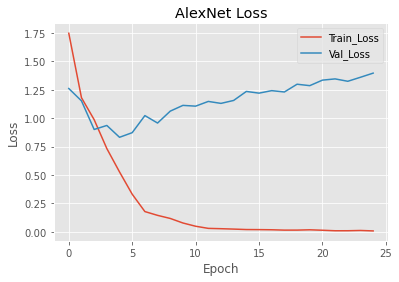

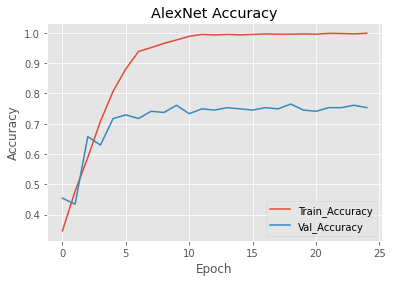

In [20]:

# Plot the loss graph
plt.style.use("ggplot")
plt.plot(history.history['loss'], label='Train_Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('AlexNet Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the accuracy graph
plt.plot(history.history['accuracy'], label='Train_Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('AlexNet Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

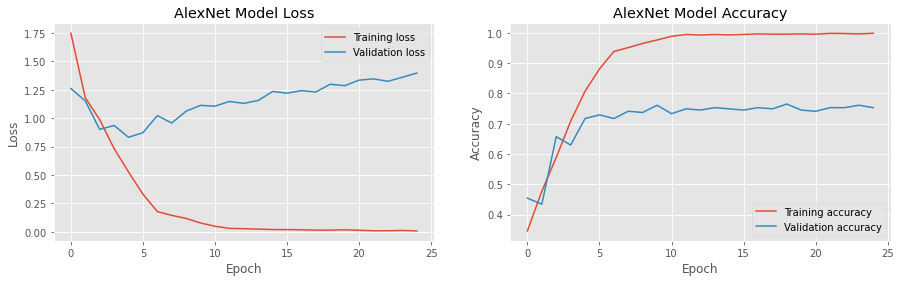

In [21]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs_range = range(len(history.history['val_accuracy']))
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend(loc='upper right')
plt.title('AlexNet Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('AlexNet Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


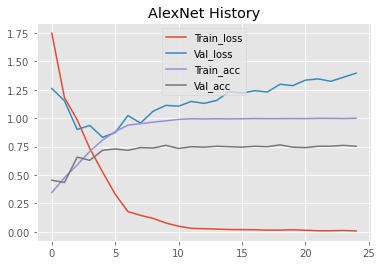

In [22]:
# Plot the loss and accuracy graphs
plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label='Val_loss')
plt.plot(history.history['accuracy'], label='Train_acc')
plt.plot(history.history['val_accuracy'], label='Val_acc')
plt.title('AlexNet History')
plt.legend()
plt.show()

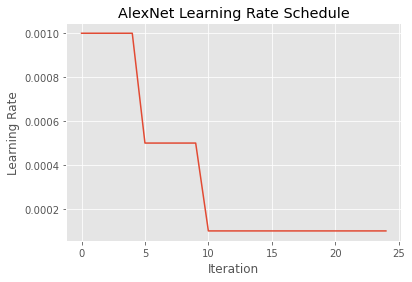

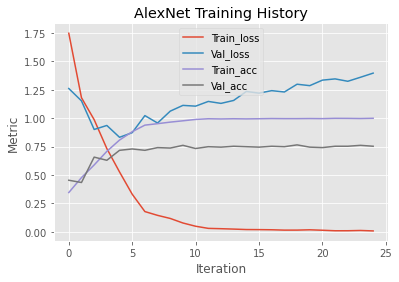

In [23]:
# Plot the learning rate and iteration graphs
iterations = np.arange(0, len(history.history['loss']))
lrs = [lr_schedule(i) for i in range(len(history.history['loss']))]

plt.plot(iterations, lrs)
plt.title('AlexNet Learning Rate Schedule')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.show()

plt.plot(iterations, history.history['loss'], label='Train_loss')
plt.plot(iterations, history.history['val_loss'], label='Val_loss')
plt.plot(iterations, history.history['accuracy'], label='Train_acc')
plt.plot(iterations, history.history['val_accuracy'], label='Val_acc')
plt.legend()
plt.title('AlexNet Training History')
plt.xlabel('Iteration')
plt.ylabel('Metric')
plt.show()

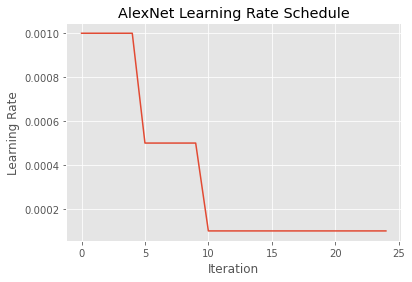

In [24]:
# Plot the learning rate and iteration graphs
iterations = np.arange(0, len(history.history['loss']))
lrs = [lr_schedule(i) for i in range(len(history.history['loss']))]

plt.plot(iterations, lrs)
plt.title('AlexNet Learning Rate Schedule')
plt.xlabel('Iteration')
plt.ylabel('Learning Rate')
plt.show()

9/9 [==============================] - 18s 2s/step
AlexNet Model Confusion Matrix
Classification Report
              precision    recall  f1-score   support

   Bicycling       0.74      0.56      0.64        71
     Dancing       0.72      0.90      0.80        60
     Running       0.75      0.82      0.78        71
     Walking       0.73      0.69      0.71        77

    accuracy                           0.73       279
   macro avg       0.74      0.74      0.73       279
weighted avg       0.74      0.73      0.73       279



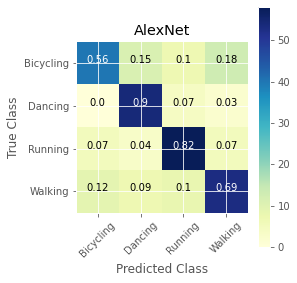

In [25]:
# here i want to define and plot my confusion matrix
# and also my classification report
def plot_confusion_matrix(cm, classes, normalize=True, title='AlexNet Model Confusion matrix', cmap=plt.cm.YlGnBu):
    
    plt.figure(figsize=(4,4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    
    
y_pred = (model.predict(x_test) > 0.5).astype("int32")

y_test_c = np.argmax(y_test, axis=1)
target_names = ["Bicycling", "Dancing", "Running", "Walking"]

Y_pred = np.argmax(model.predict(x_test),axis=1)
print('AlexNet Model Confusion Matrix')
cm = confusion_matrix(y_test_c, Y_pred)
plot_confusion_matrix(cm, target_names, normalize=True, title='AlexNet')

print('Classification Report')
print(classification_report(y_test_c, Y_pred, target_names=target_names))


In [28]:
y_pred= model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred[:15]

9/9 [==============================] - 16s 2s/step


array([1, 3, 2, 1, 2, 0, 3, 0, 1, 3, 2, 0, 2, 0, 3], dtype=int64)

In [29]:
unique,counts = np.unique(y_pred,return_counts=True)
print(unique,counts)

[0 1 2 3] [54 75 77 73]


In [30]:
y_test_new = np.argmax(y_test,axis=1)

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

clf_report = classification_report(y_test_new,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.74      0.56      0.64        71
           1       0.72      0.90      0.80        60
           2       0.75      0.82      0.78        71
           3       0.73      0.69      0.71        77

    accuracy                           0.73       279
   macro avg       0.74      0.74      0.73       279
weighted avg       0.74      0.73      0.73       279



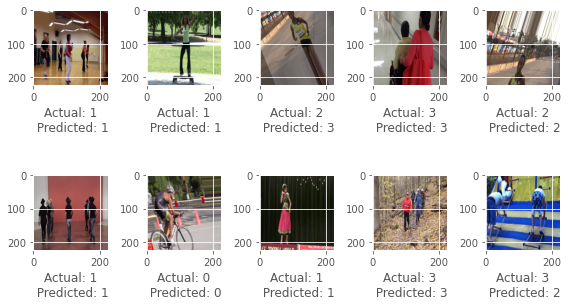

In [33]:
plt.figure(figsize=(8,5))
for i in range(10):
    sample_idx = random.choice(range(len(x_test)))
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[sample_idx])
    plt.xlabel(f"Actual: {y_test_new[sample_idx]}\n Predicted: {y_pred[sample_idx]}")
    
plt.tight_layout()
plt.show()

9/9 [==============================] - 17s 2s/step


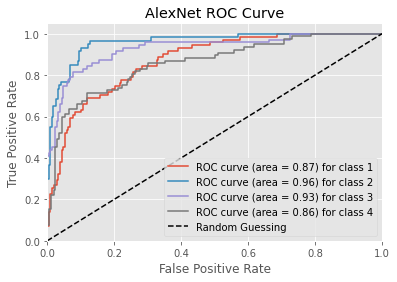

In [26]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the test set
y_pred_prob = model.predict(x_test)

# Get the true labels for the test set
y_pred  = x_test

y_test_c = np.argmax(y_test, axis=1)

# Get the false positive rate, true positive rate, and threshold values for each class
fpr = {}
tpr = {}
thresh = {}
n_classes = 4
for i in range(n_classes):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test[:, i], y_pred_prob[:, i])

# Compute the area under the curve for each class
roc_auc = {}
for i in range(n_classes):
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(6, 4))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i+1))

# Plot the random guessing curve
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

# Set the plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AlexNet ROC Curve')
plt.legend(loc="lower right")
plt.show()


9/9 [==============================] - 14s 2s/step


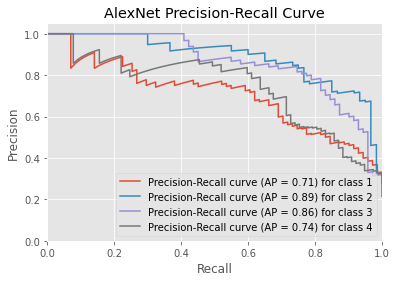

In [27]:
import numpy as np
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the test set
y_pred_prob = model.predict(x_test)


# Get the true labels for the test set
y_pred  = x_test

y_test_c = np.argmax(y_test, axis=1)

# Get the precision, recall, and threshold values for each class
precision = {}
recall = {}
thresh = {}
n_classes = 4
for i in range(n_classes):
    precision[i], recall[i], thresh[i] = precision_recall_curve(y_test[:, i], y_pred_prob[:, i])

# Compute the average precision score for each class
avg_precision = {}
for i in range(n_classes):
    avg_precision[i] = average_precision_score(y_test[:, i], y_pred_prob[:, i])

# Plot the Precision-Recall curves for each class
plt.figure(figsize=(6, 4))
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label='Precision-Recall curve (AP = %0.2f) for class %d' % (avg_precision[i], i+1))

# Set the plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('AlexNet Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()


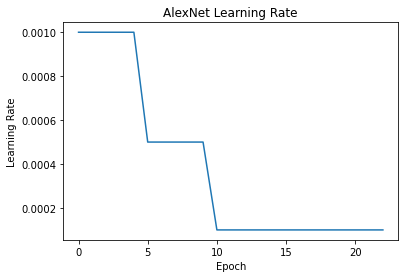

In [44]:
import matplotlib.pyplot as plt

# Get the learning rate history from the training
lr_history = history.history['lr']

# Plot the learning rate history
plt.plot(lr_history)
plt.title('AlexNet Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.show()


In [46]:
# Load the trained model
from keras.models import load_model
model = load_model('optinetv2_weights.h5')

# Load the test data
x_test = ...
y_test = ...

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Test accuracy:', accuracy)


ValueError: No model config found in the file at <tensorflow.python.platform.gfile.GFile object at 0x0000013A403F6A00>.